<div align="center">
    <h1>Amiya Das (22ce01057)</h1>
    <h3>Assignment-2</h3>
</div>   

<h3>Question-1</h3>
1.) Given the two-dimensional body <br>

<br>

<div style="margin-left: 40px">

$ B = {\{(X_1,X_2) \quad | \,\, 0.1 < X_1 < 1, \,\, 0.1 < X_2 < 1\}}, $

and the displacement field <br>

&nbsp; $ u_1 = u \cdot e_1 = 0.2 \, ln (1 + X1 + X2), $

&nbsp; $ u_2 = u \cdot e_2 = 0.2 \, e^{X_1} $

Plot the displaced shape of the body using Julia.<br>

</div>

**Hint:** First set up some characteristic lines on the body. For each point compute its displacement and
add it to the original position by noting $ x_i = e_i \cdot (X + u) $

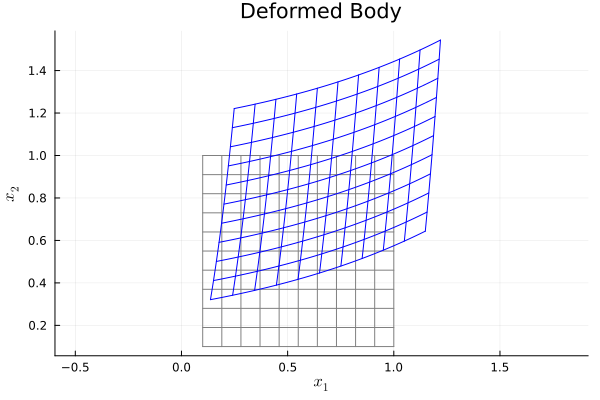

In [4]:
using Plots
using LaTeXStrings

# Plots.GRBackend()
gr()

# Displacement field
u1(X1, X2) = 0.2 * log(1.0 + X1 + X2)
u2(X1, X2) = 0.2 * exp(X1)

# Domain
x1_min, x1_max = 0.1, 1.0
x2_min, x2_max = 0.1, 1.0

# Create characteristic lines
n_lines = 11
X1_lines = range(x1_min, x1_max, length=n_lines)
X2_lines = range(x2_min, x2_max, length=n_lines)
n_points = 50
X1_range = range(x1_min, x1_max, length=n_points)
X2_range = range(x2_min, x2_max, length=n_points)

p1 = plot(title="Deformed Body", xlabel=L"x_1", ylabel=L"x_2", aspect_ratio=:equal, legend=false)

for X1 in X1_lines
    plot!(p1, fill(X1, n_points), X2_range, color=:gray)
end

for X2 in X2_lines
    plot!(p1, X1_range, fill(X2, n_points), color=:gray)
end

for X1 in X1_lines
    # Vertical lines
    x1_deformed = X1 .+ u1.(X1, X2_range)
    x2_deformed = X2_range .+ u2.(X1, X2_range)
    plot!(p1, x1_deformed, x2_deformed, color=:blue)
end

for X2 in X2_lines
    # Horizontal lines
    x1_deformed = X1_range .+ u1.(X1_range, X2)
    x2_deformed = X2 .+ u2.(X1_range, X2)
    plot!(p1, x1_deformed, x2_deformed, color=:blue)
end

savefig("Deformation.png")
display(p1) 